## Exploratory Data Analysis on Customer Attrition

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
input1=pd.read_csv('Customer Portfolio Snapshot.csv')
input1.head()

,RowNumber,CustomerId,NumOfProducts,HasChckng,IsActiveMember
0,1288,15565701,1.0,0.0,0.0
1,4199,15565706,1.0,1.0,1.0
2,7091,15565714,2.0,0.0,1.0
3,2021,15565779,1.0,1.0,0.0
4,3698,15565796,1.0,1.0,0.0


In [4]:
input2=pd.read_csv('Customer Investment Snapshot.csv')
input2.head()

,RowNumber,CustomerId,Tenure,CreditScore,Balance,EstimatedSalary
0,1,15634602.0,2.0,619.0,NaN,101348.88
1,2,15647311.0,1.0,608.0,83807.86,112542.58
2,3,15619304.0,8.0,502.0,159660.80,113931.57
3,4,15701354.0,1.0,699.0,NaN,93826.63
4,5,15737888.0,2.0,850.0,125510.82,79084.10


In [5]:
input3=pd.read_csv('Customer Demographics.csv')
input3.head()

,RowNumber,CustomerId,Surname,Geography,Gender,Age
0,1,15634602.0,Hargrave,West,Female,42.0
1,2,15647311.0,Hill,Central,Female,41.0
2,3,15619304.0,Onio,West,Female,42.0
3,4,15701354.0,Boni,West,Female,39.0
4,5,15737888.0,Mitchell,Central,Female,43.0


In [6]:
input4=pd.read_csv('Customer Attrition Status.csv')
input4.head()

,RowNumber,CustomerId,Exited
0,1,15634602.0,1.0
1,2,15647311.0,0.0
2,3,15619304.0,1.0
3,4,15701354.0,0.0
4,5,15737888.0,0.0


In [7]:
df_dummy1 = pd.merge((pd.merge((pd.merge(input1, input2, on='CustomerId')),input3, on='CustomerId')),input4, on='CustomerId')

df_dummy1.head()

,RowNumber_x,CustomerId,NumOfProducts,HasChckng,IsActiveMember,RowNumber_y,Tenure,CreditScore,Balance,EstimatedSalary,RowNumber_x,Surname,Geography,Gender,Age,RowNumber_y,Exited
0,1288,15565701,1.0,0.0,0.0,1288,9.0,698.0,161993.89,90212.38,1288,Ferri,Central,Female,39.0,1288,0.0
1,4199,15565706,1.0,1.0,1.0,4199,1.0,612.0,NaN,83256.26,4199,Akobundu,Central,Male,35.0,4199,1.0
2,7091,15565714,2.0,0.0,1.0,7091,1.0,601.0,64430.06,96517.97,7091,Cattaneo,West,Male,47.0,7091,0.0
3,2021,15565779,1.0,1.0,0.0,2021,6.0,627.0,57809.32,188258.49,2021,Kent,East,Female,30.0,2021,0.0
4,3698,15565796,1.0,1.0,0.0,3698,10.0,745.0,96048.55,74510.65,3698,Docherty,East,Male,48.0,3698,0.0


In [34]:
df=df_dummy1.drop(['RowNumber_x', 'RowNumber_y'], axis = 1)

In [35]:
df.head()

,CustomerId,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Surname,Geography,Gender,Age,Exited
0,15565701,1.0,0.0,0.0,9.0,698.0,161993.89,90212.38,Ferri,Central,Female,39.0,0.0
1,15565706,1.0,1.0,1.0,1.0,612.0,NaN,83256.26,Akobundu,Central,Male,35.0,1.0
2,15565714,2.0,0.0,1.0,1.0,601.0,64430.06,96517.97,Cattaneo,West,Male,47.0,0.0
3,15565779,1.0,1.0,0.0,6.0,627.0,57809.32,188258.49,Kent,East,Female,30.0,0.0
4,15565796,1.0,1.0,0.0,10.0,745.0,96048.55,74510.65,Docherty,East,Male,48.0,0.0


In [36]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
9997     False
9998     False
9999     False
10000    False
10001    False
Length: 10002, dtype: bool

In [37]:
df.describe()

,CustomerId,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Age,Exited
count,1.000200e+04,10002.000000,10002.000000,10002.000000,10002.000000,9999.00000,6385.000000,10002.000000,10002.000000,10002.000000
mean,1.569097e+07,1.530494,0.705359,0.514997,5.014797,650.50075,119841.627383,100105.624356,38.943711,0.203859
std,7.195055e+04,0.581967,0.455904,0.499800,2.902953,96.69932,30100.935329,57515.031841,10.612675,0.402886
min,1.556570e+07,1.000000,0.000000,0.000000,0.000000,305.00000,3768.690000,11.580000,18.000000,0.000000
25%,1.562854e+07,1.000000,0.000000,0.000000,3.000000,584.00000,100194.440000,51012.472500,32.000000,0.000000
50%,1.569074e+07,1.000000,1.000000,1.000000,5.000000,652.00000,119852.010000,100218.210000,37.000000,0.000000
75%,1.575331e+07,2.000000,1.000000,1.000000,7.000000,717.50000,139529.930000,149400.922500,44.000000,0.000000
max,1.581569e+07,4.000000,1.000000,1.000000,30.000000,865.00000,250898.090000,199992.480000,190.000000,1.000000


## Checking for True duplicates in Data

In [38]:
df[df[['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasChckng', 'IsActiveMember', 'EstimatedSalary', 'Exited']].duplicated() == True]

,CustomerId,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Surname,Geography,Gender,Age,Exited
9989,15815490,3.0,0.0,0.0,2.0,670.0,164948.98,177028.0,Cocci,East,Male,40.0,1.0
9990,15815490,3.0,0.0,0.0,2.0,670.0,164948.98,177028.0,Cocci,East,Male,40.0,1.0


In [39]:
subset = ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasChckng', 'IsActiveMember', 'EstimatedSalary', 'Exited']

In [40]:
df=df.drop_duplicates(subset,keep = 'last').reset_index(drop = True)

In [41]:
df[df[['CustomerId']].duplicated() == True]

,CustomerId,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Surname,Geography,Gender,Age,Exited


In [42]:
duplicateDFRow = df[df.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [CustomerId, NumOfProducts, HasChckng, IsActiveMember, Tenure, CreditScore, Balance, EstimatedSalary, Surname, Geography, Gender, Age, Exited]
Index: []


## Statistical overview of data

In [43]:
# data conatins 14 columns and 10,000 datapoints
df.shape

(10000, 13)

In [44]:
df.Gender.unique()

array(['Female', 'Male', 'Neutral'], dtype=object)

In [45]:
df.IsActiveMember.unique()

array([0., 1.])

In [46]:
#checking the missing values across columns

df.isnull().sum()

CustomerId            0
NumOfProducts         0
HasChckng             0
IsActiveMember        0
Tenure                0
CreditScore           3
Balance            3617
EstimatedSalary       0
Surname               0
Geography             0
Gender                0
Age                   0
Exited                0
dtype: int64

In [47]:
#checking how the data have been distributed (symmetrical or asymmetrical)
df.skew()

CustomerId         0.001149
NumOfProducts      0.745568
HasChckng         -0.901812
IsActiveMember    -0.060437
Tenure             0.071980
CreditScore       -0.074910
Balance            0.025624
EstimatedSalary    0.002085
Age                1.278170
Exited             1.471611
dtype: float64

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

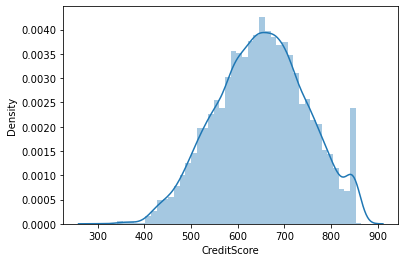

In [48]:
#CreditScore have 3 missing values within it and from below graph, it looks symmetrical with a skewness of -0.075

sns.distplot(df['CreditScore'])

<AxesSubplot:xlabel='Balance', ylabel='Density'>

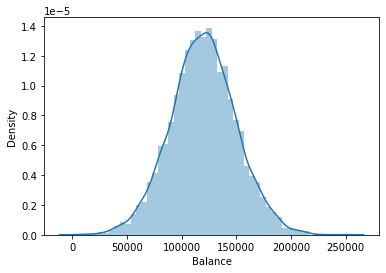

In [49]:
sns.distplot(df['Balance'])

<AxesSubplot:xlabel='EstimatedSalary'>

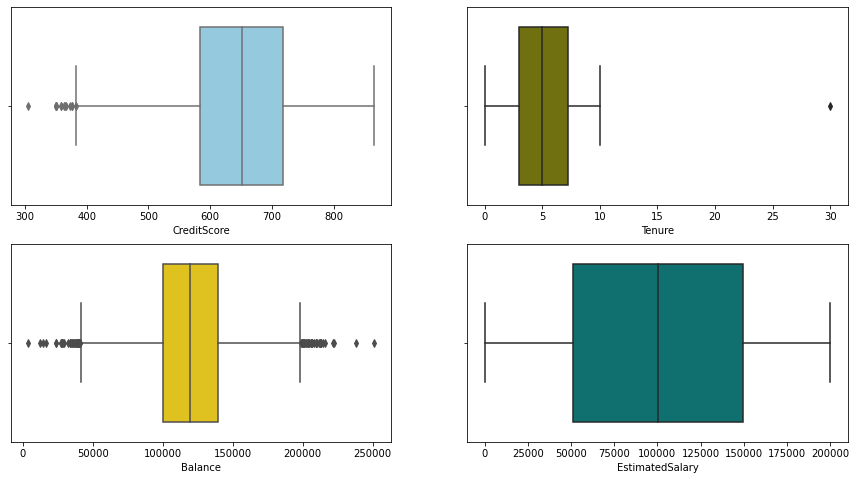

In [50]:
fig,axs = plt.subplots(2, 2, figsize=(15, 8))
sns.boxplot(data=df, x="CreditScore", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df, x="Tenure", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="Balance", color="gold", ax=axs[1, 0])
sns.boxplot(data=df, x="EstimatedSalary", color="teal", ax=axs[1, 1])



<AxesSubplot:xlabel='CreditScore', ylabel='Gender'>

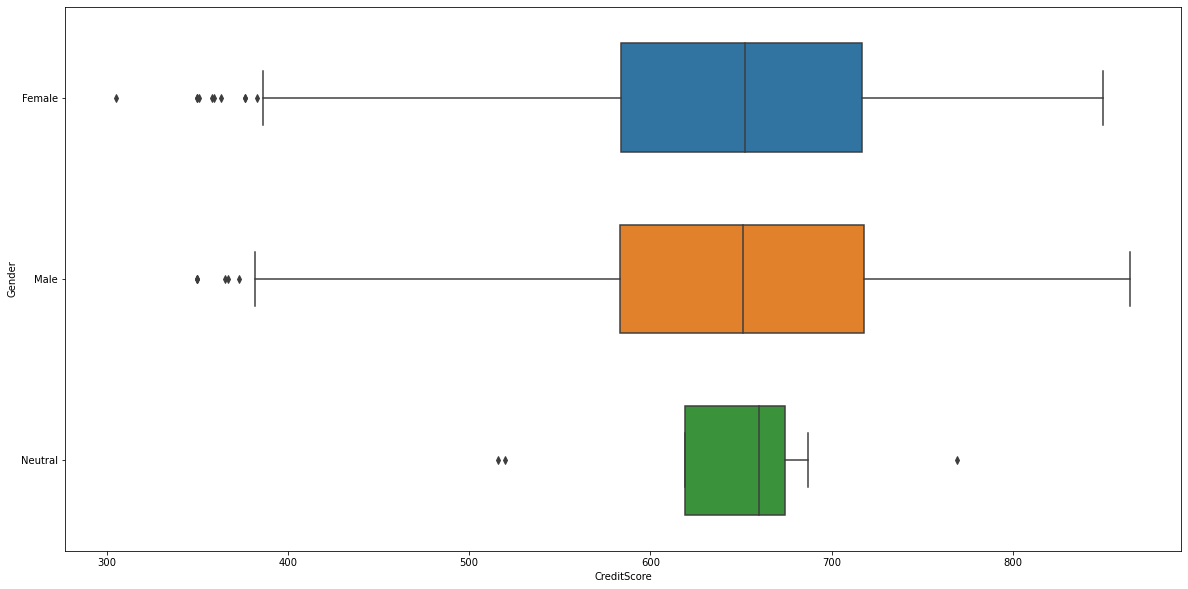

In [51]:
#Analysis distribution of credit score across genders

f = plt.figure(figsize=(20, 10))
sns.boxplot(x='CreditScore', y='Gender', data=df, orient="h", width=0.6)

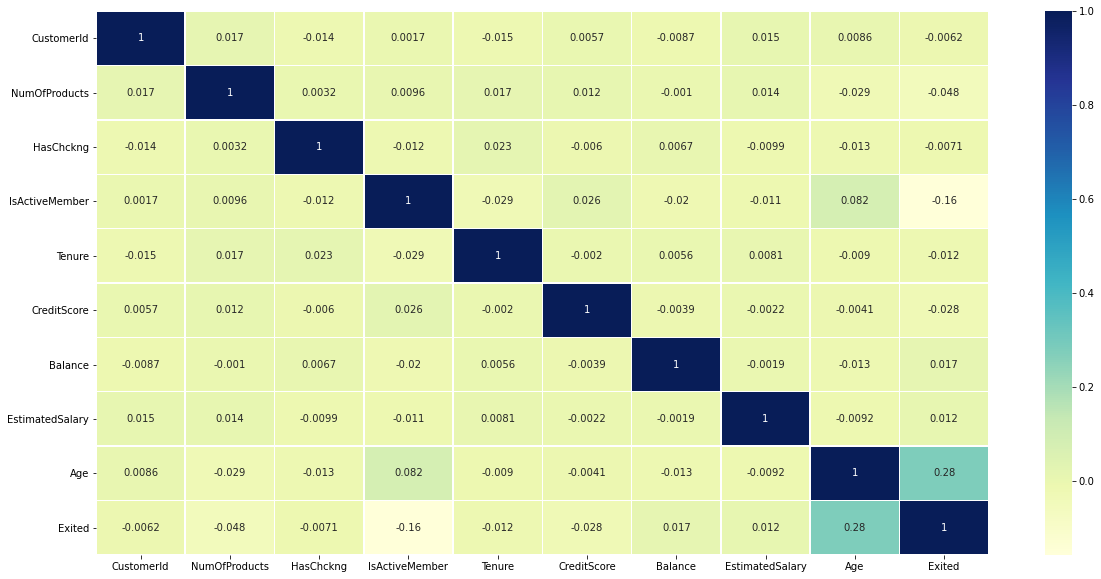

In [52]:
#Checking the collinearity between features

plt.figure(figsize = (20, 10))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True,linewidths = 0.5,)
plt.show()

From the statistical of overview of data, we found out that the data is almost symmetrical across columns except couple of features like age, HasChcng where skewness is not in range of [-0.5,0.5]



# Missing value imputation for CreditScore feature

Since the data spread for CreditScore is symmetrical with a skewness of -0.075, we will impute the missing values with it's mean

In [53]:
#First let's analyse the data with missing Credit Score

df_missing = df[df['CreditScore'].isna()]

In [54]:
df_missing

,CustomerId,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Surname,Geography,Gender,Age,Exited
1508,15604119,1.0,0.0,0.0,7.0,NaN,110349.82,126355.80,Alderete,Central,Male,35.0,0.0
3878,15662976,1.0,1.0,1.0,8.0,NaN,NaN,186062.36,Lettiere,Central,Male,37.0,0.0
6726,15733616,1.0,1.0,1.0,5.0,NaN,80613.93,142838.64,Sopuluchukwu,West,Male,40.0,0.0


## Imputing missing values with mean

In [55]:
#Using mean to impute the missing values
missing_col = ['CreditScore']
for i in missing_col:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [56]:
#checking the missing values after imputation
df.isnull().sum()

CustomerId            0
NumOfProducts         0
HasChckng             0
IsActiveMember        0
Tenure                0
CreditScore           0
Balance            3617
EstimatedSalary       0
Surname               0
Geography             0
Gender                0
Age                   0
Exited                0
dtype: int64

# Missing value imputation for Balance feature

In [58]:
#Using mean to impute the missing values
missing_col = ['Balance']
for i in missing_col:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [60]:
#checking the missing values after imputation
df.isnull().sum()

CustomerId         0
NumOfProducts      0
HasChckng          0
IsActiveMember     0
Tenure             0
CreditScore        0
Balance            0
EstimatedSalary    0
Surname            0
Geography          0
Gender             0
Age                0
Exited             0
dtype: int64

Till this step, we have handled the missing values and did a basic stat check for collinearity and spread of data across dataset.

# Analysis statistics on clients attrition rate

<AxesSubplot:xlabel='Exited', ylabel='count'>

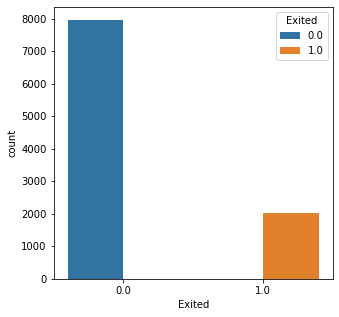

In [61]:
# count 
plt.figure(figsize = (5, 5))
sns.countplot(x="Exited",data=df, hue="Exited")

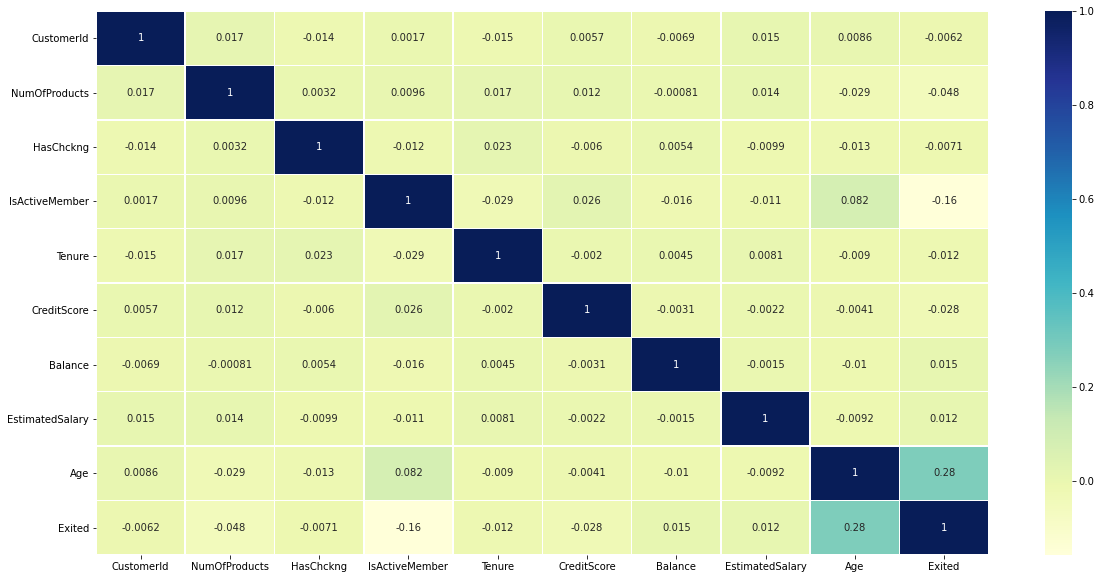

In [62]:
plt.figure(figsize = (20, 10))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True,linewidths = 0.5,)
plt.show()

<AxesSubplot:xlabel='Exited', ylabel='IsActiveMember'>

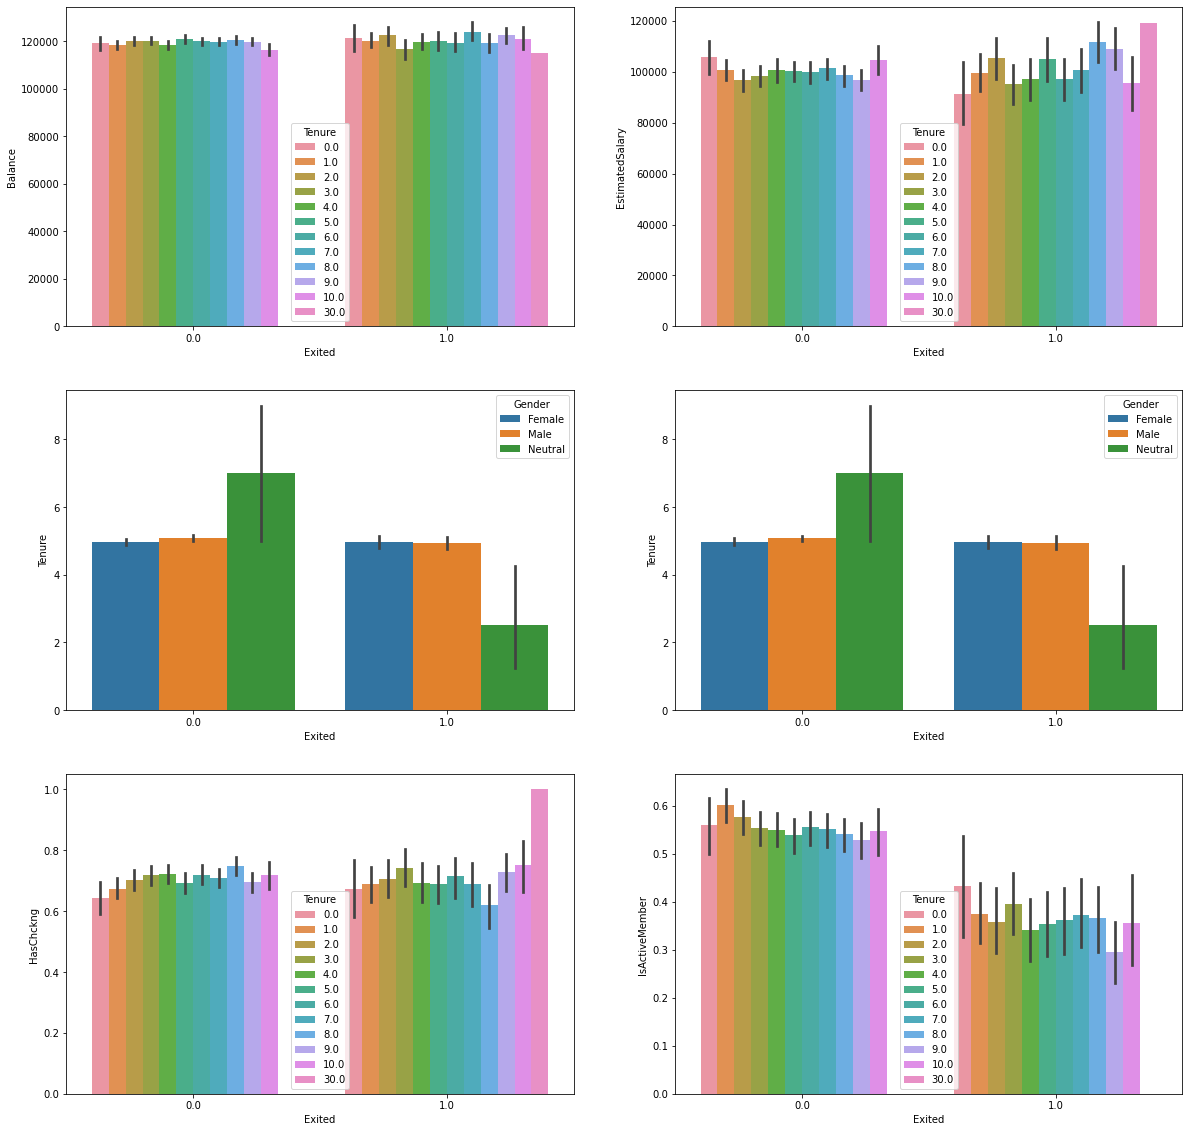

In [47]:
#Plotting the different bar charts to analyze data

fig, ax = plt.subplots(3, 2, figsize = (20, 20))
sns.barplot(x="Exited", y="Balance",hue="Tenure", data=df,ax = ax[0][0])
sns.barplot(x="Exited", y="EstimatedSalary",hue="Tenure", data=df,ax = ax[0][1])
sns.barplot(x="Exited", y="Tenure",hue="Gender", data=df,ax = ax[1][0])
sns.barplot(x="Exited", y="Tenure",hue="Gender", data=df,ax = ax[1][1])
sns.barplot(x="Exited", y="HasChckng",hue="Tenure", data=df,ax = ax[2][0])
sns.barplot(x="Exited", y="IsActiveMember",hue="Tenure", data=df,ax = ax[2][1])


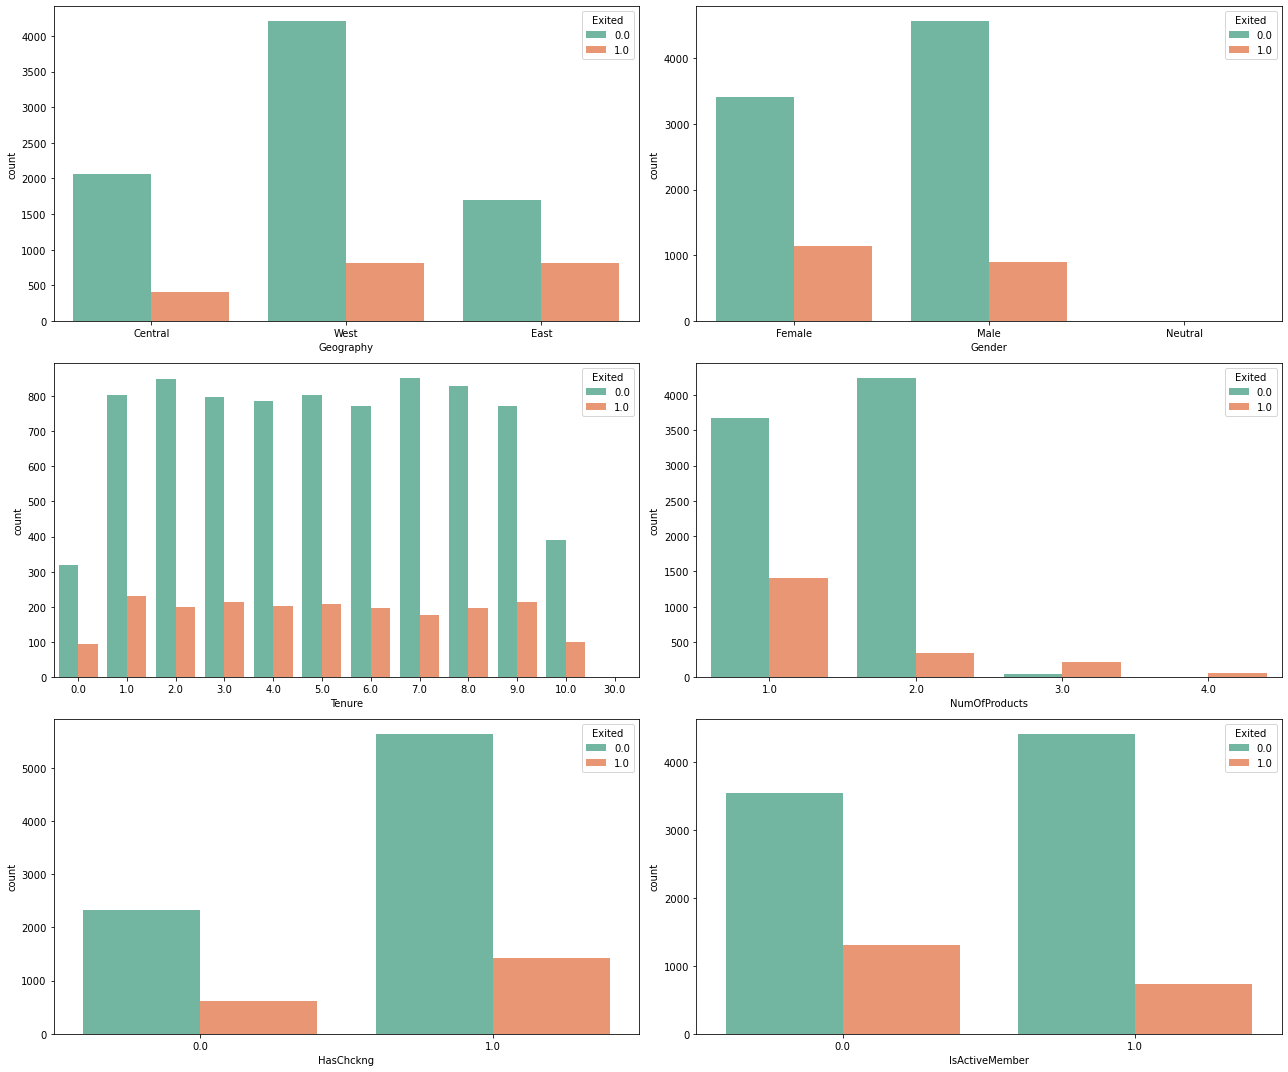

In [48]:
# Analysing categorical variables to see the trend of customers got churned

fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = df, ax = ax[0][0],palette="Set2")
sns.countplot('Gender', hue = 'Exited', data = df, ax = ax[0][1],palette="Set2")
sns.countplot('Tenure', hue = 'Exited', data = df, ax = ax[1][0],palette="Set2")
sns.countplot('NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1],palette="Set2")
sns.countplot('HasChckng', hue = 'Exited', data = df, ax = ax[2][0],palette="Set2")
sns.countplot('IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1],palette="Set2")

plt.tight_layout()
plt.show()

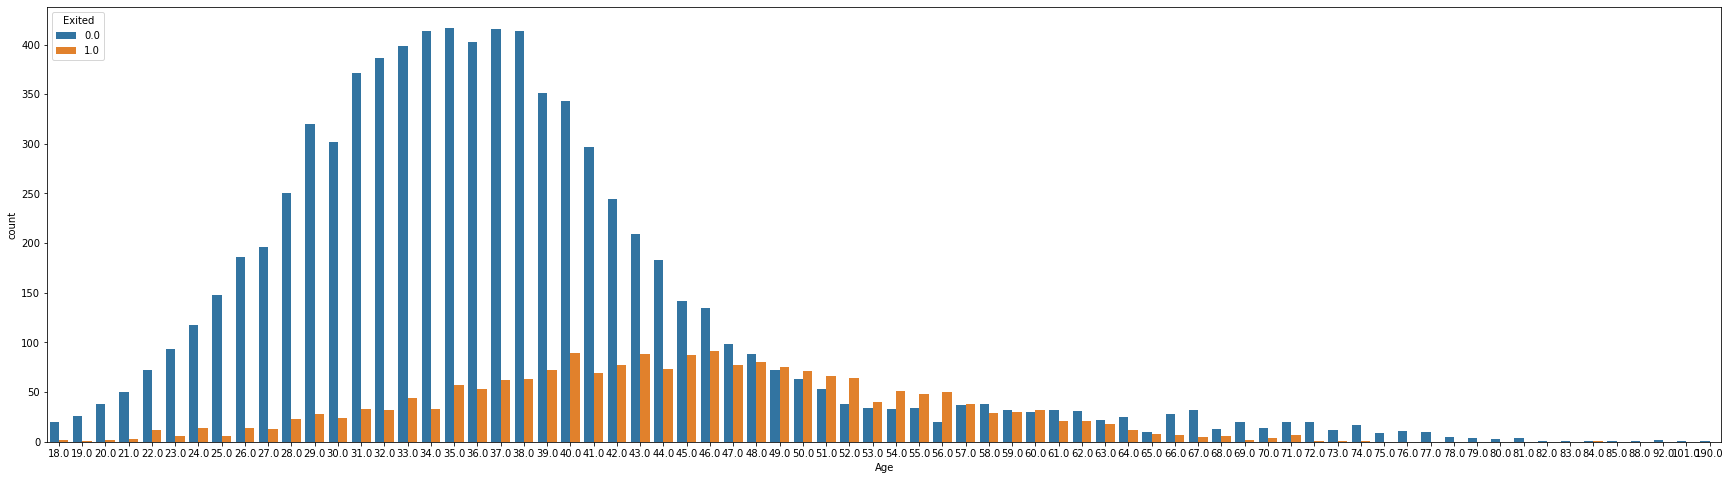

In [66]:
plt.figure(figsize = (30, 8))
sns.countplot(x="Age",data=df, hue="Exited")
plt.show()

# Bonus Contents wrt to Advance analytics

In [68]:
# lets remove the columns from dataframe which are just identifiers (non-essential columns)
df1=df.drop(['CustomerId','Surname'],axis=1)

In [69]:
df1.head()

,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Geography,Gender,Age,Exited
0,1.0,0.0,0.0,9.0,698.0,161993.890000,90212.38,Central,Female,39.0,0.0
1,1.0,1.0,1.0,1.0,612.0,119827.493793,83256.26,Central,Male,35.0,1.0
2,2.0,0.0,1.0,1.0,601.0,64430.060000,96517.97,West,Male,47.0,0.0
3,1.0,1.0,0.0,6.0,627.0,57809.320000,188258.49,East,Female,30.0,0.0
4,1.0,1.0,0.0,10.0,745.0,96048.550000,74510.65,East,Male,48.0,0.0


Using One Hot Encoding For Geography and Gender feature

In [81]:
# importing one hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df1[['Geography','Gender']]).toarray())

df2 = df1.join(enc_df)
df2.head()

,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Geography,Gender,Age,Exited,0,1,2,3,4,5
0,1.0,0.0,0.0,9.0,698.0,161993.890000,90212.38,Central,Female,39.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,612.0,119827.493793,83256.26,Central,Male,35.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2.0,0.0,1.0,1.0,601.0,64430.060000,96517.97,West,Male,47.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,0.0,6.0,627.0,57809.320000,188258.49,East,Female,30.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,10.0,745.0,96048.550000,74510.65,East,Male,48.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### understanding OneHotEncoding

In [70]:
dummies1 = pd.get_dummies(df.Geography)
dummies1.head(5)

,Central,East,West
0,1,0,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0


In [71]:
dummies2 = pd.get_dummies(df.Gender)
dummies2.head(5)

,Female,Male,Neutral
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [73]:
#Merging dummies dataframes with main dataframe to get categorical features for Gender and Geography

df_input = pd.concat([df1,dummies1,dummies2],axis='columns')
df_input.head()

,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Geography,Gender,Age,Exited,Central,East,West,Female,Male,Neutral
0,1.0,0.0,0.0,9.0,698.0,161993.890000,90212.38,Central,Female,39.0,0.0,1,0,0,1,0,0
1,1.0,1.0,1.0,1.0,612.0,119827.493793,83256.26,Central,Male,35.0,1.0,1,0,0,0,1,0
2,2.0,0.0,1.0,1.0,601.0,64430.060000,96517.97,West,Male,47.0,0.0,0,0,1,0,1,0
3,1.0,1.0,0.0,6.0,627.0,57809.320000,188258.49,East,Female,30.0,0.0,0,1,0,1,0,0
4,1.0,1.0,0.0,10.0,745.0,96048.550000,74510.65,East,Male,48.0,0.0,0,1,0,0,1,0


In [74]:
#Dropping duplicated features for Gender and Geography

df_input = df_input.drop('Geography',axis='columns')
df_input = df_input.drop('Gender',axis='columns')
df_input.head()

,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Age,Exited,Central,East,West,Female,Male,Neutral
0,1.0,0.0,0.0,9.0,698.0,161993.890000,90212.38,39.0,0.0,1,0,0,1,0,0
1,1.0,1.0,1.0,1.0,612.0,119827.493793,83256.26,35.0,1.0,1,0,0,0,1,0
2,2.0,0.0,1.0,1.0,601.0,64430.060000,96517.97,47.0,0.0,0,0,1,0,1,0
3,1.0,1.0,0.0,6.0,627.0,57809.320000,188258.49,30.0,0.0,0,1,0,1,0,0
4,1.0,1.0,0.0,10.0,745.0,96048.550000,74510.65,48.0,0.0,0,1,0,0,1,0


In [75]:
# Removing the dependent variable from dataframe/ creating the independent dataframes which will be input to model

X=df_input.drop('Exited',axis='columns')
X.head(5)

,NumOfProducts,HasChckng,IsActiveMember,Tenure,CreditScore,Balance,EstimatedSalary,Age,Central,East,West,Female,Male,Neutral
0,1.0,0.0,0.0,9.0,698.0,161993.890000,90212.38,39.0,1,0,0,1,0,0
1,1.0,1.0,1.0,1.0,612.0,119827.493793,83256.26,35.0,1,0,0,0,1,0
2,2.0,0.0,1.0,1.0,601.0,64430.060000,96517.97,47.0,0,0,1,0,1,0
3,1.0,1.0,0.0,6.0,627.0,57809.320000,188258.49,30.0,0,1,0,1,0,0
4,1.0,1.0,0.0,10.0,745.0,96048.550000,74510.65,48.0,0,1,0,0,1,0


In [76]:
X.shape

(10000, 14)

### A gist of Machine Learning Algorithm (To get the importance of EDA)

In [77]:
# Removing the independent variables from dataframe/ creating the dependent dataframes which will be input to model 
# for testing and validating the model


y=df_input.Exited
y.head(5)

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Exited, dtype: float64

In [78]:
#creating the train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [84]:
# Using K Fold cross validation to measure accuracy of model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble.forest import DecisionTreeClassifier

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

cross_val_score(DecisionTreeClassifier(), X, y, cv=cv)

array([0.7892, 0.7768, 0.7876, 0.784 , 0.7952])

In [82]:
# Using K Fold cross validation to measure accuracy of model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble.forest import RandomForestClassifier

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

cross_val_score(RandomForestClassifier(), X, y, cv=cv)

array([0.8628, 0.852 , 0.854 , 0.8616, 0.8656])

In [85]:
#Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Creating a Gaussian Classifier
clf=RandomForestClassifier(max_features= 'log2',n_estimators=1000,oob_score=True)

#Training the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [86]:
#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8676


In [87]:
features=list(X.columns)
features

['NumOfProducts',
 'HasChckng',
 'IsActiveMember',
 'Tenure',
 'CreditScore',
 'Balance',
 'EstimatedSalary',
 'Age',
 'Central',
 'East',
 'West',
 'Female',
 'Male',
 'Neutral']

In [88]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

Age                0.235261
Balance            0.147472
EstimatedSalary    0.146458
CreditScore        0.144262
NumOfProducts      0.124633
Tenure             0.084497
IsActiveMember     0.040933
East               0.020757
HasChckng          0.017998
West               0.010461
Male               0.009440
Female             0.008695
Central            0.008534
Neutral            0.000600
dtype: float64

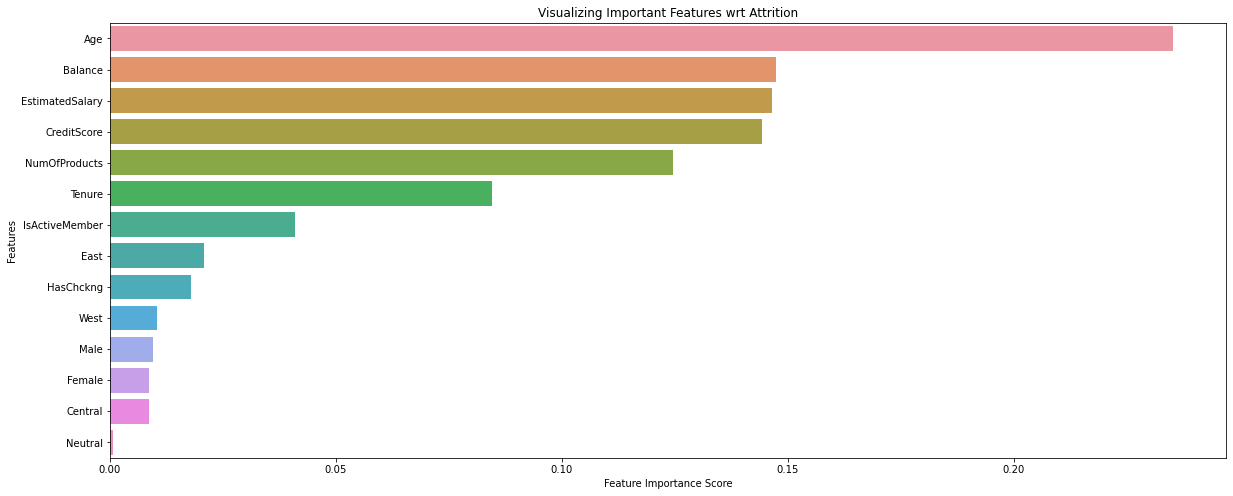

In [89]:
# Creating a bar plot visulize the features with their importance in predicting outcomes in model 

plt.figure(figsize = (20, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features wrt Attrition")
plt.show()

In [90]:
model = RandomForestClassifier()
# fitting the model on the whole dataset
model.fit(X, y)
# making a single prediction
row = [[266.0,23,3,1000,0,1,1,500,0,0,1,1,0,0]]
Result = model.predict(row)
print('Predicted Class: %d' % Result)

Predicted Class: 1


## EDA Report

## Insights retrieved from data based from above charts:

* Overall <b>20.37%</b> of clients have been exited based on dataset.

* The client's attrition across geography but the rate is quite high in East region with a percentage of <b>32.5%</b> followed by <b>16.17%</b> in Central and <b>16.15%</b> in West region.

* <b>25%</b> of female attrition rate with compared to <b>16.43%</b> in male and <b>50%</b> in Neutral.

* Clients attrition rate is more where only <b>1</b>  product is in their portfolio.

<b>East Zone Analysis:</b>

* Overall, <b>25.09%</b> of clients are based in East zone, where attrition rate in <b>32.5%</b> out of which <b>71.2%</b> of clients have only <b>1</b>  product in their portfolio.
* <b>15.5%</b> attrition in clients with 2  product in their portfolio.
* 13.5% attrition in clients with 3 or more  product in their portfolio

<b>Central Zone Analysis:</b>

* Overall, <b>24.77%</b> of clients are based in East zone, where attrition rate in <b>16.7%</b> out of which <b>64.65%</b> of clients have only 1  product in their portfolio.

<b> West Zone Analysis:</b>

* <b>50.14%</b> of clients are based in East zone, where attrition rate in <b>16.15%</b> out of which <b>69.62%</b> of clients have only 1  product in their portfolio.

<b>Based on Investment balance snapshot</b>
* out of ~64% of clients with investment balance greater than 8000, ~<b>24%</b> of clients have been Exited out of which <b>70%</b> of clients were having only 1  product in their portfolio.
* out of total 2037 churned clients, 500 of them have the <b>ZERO (0) </b> Investment balance snapshot in their portfolio which account for <b>24.55%</b> of attritioned clients


<b>Portfolios factors wrt clients attrition</b>

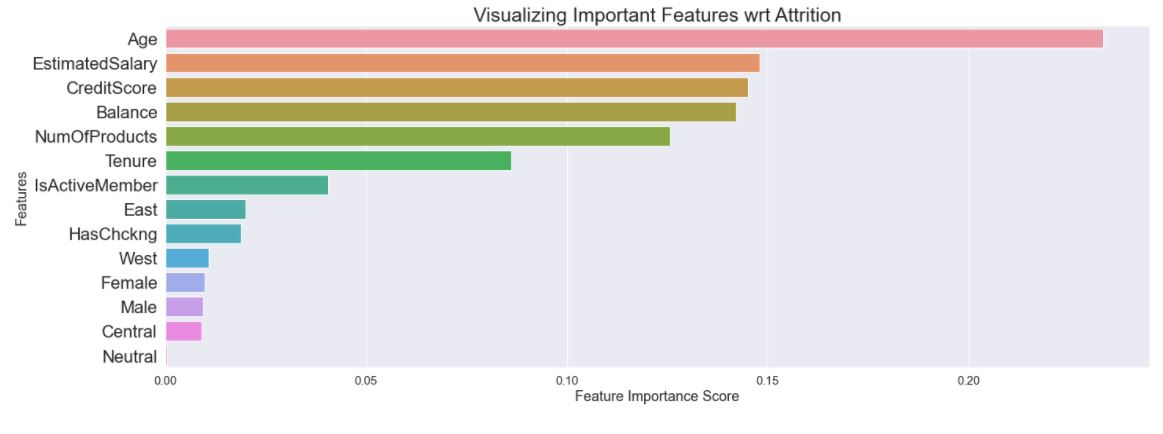

<b> End of Report</b>